In [2]:
using Gadfly           ## This package provides 'plot', the plotting function
using Distributions    ## This package provides 'Normal', random number generator for gaussian distributions

# Introduction

**Linear regression** is an approach for modeling the relationship between a scalar dependent variable $y$ and one or more explanatory variables (or independent variables) denoted $X$. The case of one explanatory variable is called *simple linear regression*. For more than one explanatory variable, the process is called *multiple linear regression*.$^1$ (This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.$^2$

We assume that the equation

$y_i = \beta_0 + \beta_1 X_i + \epsilon_i$ where $\epsilon_i \approx N(0, \sigma^2)$


***
$^1$ David A. Freedman (2009). Statistical Models: Theory and Practice. Cambridge University Press. p. 26. A simple regression equation has on the right hand side an intercept and an explanatory variable with a slope coefficient. A multiple regression equation has two or more explanatory variables on the right hand side, each with its own slope coefficient

$^2$ Rencher, Alvin C.; Christensen, William F. (2012), "Chapter 10, Multivariate regression – Section 10.1, Introduction", Methods of Multivariate Analysis, Wiley Series in Probability and Statistics, 709 (3rd ed.), John Wiley &amp; Sons, p. 19, ISBN 9781118391679.

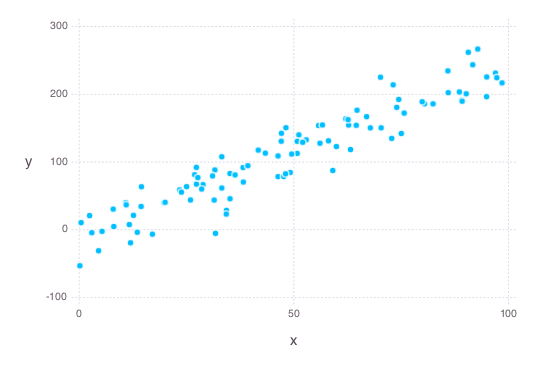

In [2]:
n = 100  # numeber of samples
Xᵣ = rand(n)*99.0
y = -7.3 + 2.5Xᵣ + rand(Normal(0.0, 27.0), n)
plot(x=Xᵣ, y=y, Geom.point)

Let's add the *bias*, i.e. a column of $1$s to the explanatory variables

In [3]:
X = [ones(n) Xᵣ]

100×2 Array{Float64,2}:
 1.0  73.136   
 1.0  23.42    
 1.0   5.33908 
 1.0  75.5994  
 1.0  14.5112  
 1.0  26.9157  
 1.0  50.7828  
 1.0  74.4266  
 1.0  38.1909  
 1.0  64.5372  
 1.0  47.0652  
 1.0  46.3365  
 1.0  82.4212  
 ⋮             
 1.0  31.4504  
 1.0  34.2681  
 1.0  90.1471  
 1.0   0.460934
 1.0  52.0685  
 1.0  75.0258  
 1.0  38.2424  
 1.0  66.9382  
 1.0  17.073   
 1.0  35.1467  
 1.0  28.5416  
 1.0  94.8893  

# Closed-form Linear Regression

And compute the parametes $\beta_0$  and $\beta_1$ according to
$$ \beta = (X^\prime X)^{-1} X^\prime y $$
***
**Note:**
This not only looks elegant but can also be written in Julia code. However, matrix inversion $M^{-1}$ requires $O(d^3)$ iterations for a $d\times d$ matrix.<br /> 
https://www.coursera.org/learn/ml-regression/lecture/jOVX8/discussing-the-closed-form-solution

In [54]:
∧ = &

& (generic function with 35 methods)

In [55]:
true ∧ false

false

In [4]:
β = inv(X'*X)*X'*y    ## inv(M) for M⁻¹

2-element Array{Float64,1}:
 -11.6367 
   2.52739

In [5]:
ŷ = X*β

100-element Array{Float64,1}:
 173.206  
  47.5549 
   1.85727
 179.432  
  25.0388 
  56.3897 
 116.711  
 176.468  
  84.8867 
 151.474  
 107.315  
 105.474  
 196.674  
   ⋮      
  67.8509 
  74.972  
 216.2    
 -10.4717 
 119.961  
 177.983  
  85.0168 
 157.542  
  31.5135 
  77.1926 
  60.499  
 228.185  

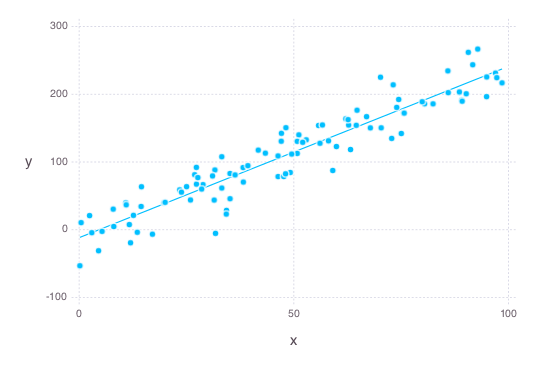

In [6]:
plot(
    layer(x=X[:,2], y=y, Geom.point),
    layer(x=X[:,2], y=ŷ, Geom.line)
    )

# Multiple Linear Regression

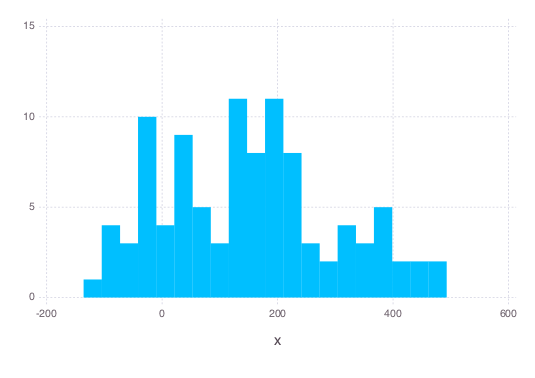

In [7]:
n = 100  # numeber of samples
X₁ = rand(n)*99.0
X₂ = rand(n)*51.0 - 26.8
X₃ = rand(n)*5.0 + 6.1
X₄ = rand(n)*1.0 - 0.5
X₅ = rand(n)*300.0

y = -7.3 + 2.5X₁ + -7.9X₂ + 1.5X₃ + 10.0X₄ + 0.13X₅ + rand(Normal(0.0, 27.0), n)
plot(x=y, Geom.histogram(bincount=20))

In [8]:
X = [ones(n) X₁ X₂ X₃ X₄ X₅]

100×6 Array{Float64,2}:
 1.0  10.4866    13.1992     9.14054   0.142596   181.226  
 1.0  68.0478    17.5282    10.1728   -0.491907    25.9263 
 1.0   2.62587  -19.3419     9.98039  -0.185792   194.357  
 1.0  17.4084    23.286      8.43906   0.423532    74.7775 
 1.0  42.0316    19.7211     7.09055   0.339717   191.086  
 1.0  15.922    -16.0851     7.25773  -0.437522   221.5    
 1.0  44.9859    -0.542744   8.70204   0.403531   277.597  
 1.0  55.8456   -13.4682     9.31068   0.460078     5.24425
 1.0  80.598     10.3456    10.0165    0.131136    58.8045 
 1.0  37.1746   -14.4879    10.0281   -0.218947   189.154  
 1.0  31.7636    14.0289     8.07828  -0.241542    97.8422 
 1.0  33.9709    -1.61793   10.6657    0.179253   286.091  
 1.0  74.1845   -20.0088     8.93154   0.454011   220.511  
 ⋮                                                  ⋮      
 1.0  91.6044   -25.2851     7.4071    0.485164   223.514  
 1.0  26.4938     4.70165   10.7488    0.256495   135.768  
 1.0  35.0407   

In [9]:
β = inv(X'*X)*X'*y

6-element Array{Float64,1}:
 20.5236  
  2.53898 
 -7.86501 
 -2.48317 
 10.7746  
  0.148399

In [10]:
ŷ = X*β

100-element Array{Float64,1}:
  -50.9307 
   28.7223 
  181.373  
 -123.717  
  -13.4553 
  197.593  
  162.945  
  250.857  
  129.059  
  229.666  
  -17.3097 
  137.402  
  381.683  
    ⋮      
  471.976  
   47.0327 
    3.49495
  132.466  
  164.542  
   21.9438 
  350.564  
  -52.7383 
  410.202  
   60.6532 
   76.4815 
  177.358  

# Evaluation: Root-mean-square Deviation
The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model or an estimator and the values actually observed. The RMSD represents the sample standard deviation of the differences between predicted values and observed values. These individual differences are called residuals when the calculations are performed over the data sample that was used for estimation, and are called prediction errors when computed out-of-sample. The RMSD serves to aggregate the magnitudes of the errors in predictions for various times into a single measure of predictive power. RMSD is a good measure of accuracy, but only to compare forecasting errors of different models for a particular variable and not between variables, as it is scale-dependent.$^1$

![](imgs/fc187c3557d633423444d4c80a4a50cd6ecc3dd4.svg)
***
$^1$  Hyndman, Rob J. Koehler, Anne B.; Koehler (2006). "Another look at measures of forecast accuracy". International Journal of Forecasting. 22 (4): 679–688. doi:10.1016/j.ijforecast.2006.03.001.

In [11]:
RSMD = √mean((ŷ-y).^2) 
## alternatively
## Σ = sum
## RSMD = √(Σ((ŷ-y).^2)/n) 

25.46337526050898

# Regularization, Ridge-Regression

Regularization, in mathematics and statistics and particularly in the fields of machine learning and inverse problems, is a process of introducing additional information in order to solve an ill-posed problem or to prevent overfitting.


In general, a regularization term $R(f)$ is introduced to a general loss function:

![](imgs/872d3606639c7bc8ad91ab4a2976663a77d657c3.svg)
for a loss function  $V$ that describes the cost of predicting $f(x)$ when the label is 
$y$, such as the square loss or hinge loss, and for the term 
$\lambda$  which controls the importance of the regularization term. 
$R(f)$ is typically a penalty on the complexity of 
$f$, such as restrictions for smoothness or bounds on the vector space norm.$^1$

A theoretical justification for regularization is that it attempts to impose Occam's razor on the solution, as depicted in the figure. From a Bayesian point of view, many regularization techniques correspond to imposing certain prior distributions on model parameters.

Regularization can be used to learn simpler models, induce models to be sparse, introduce group structure into the learning problem, and more.

We're going to add the L2 term $\lambda||\beta||_2^2$ to the regression equation, which yields to$^2$

$$ \beta = (X^\prime X + \lambda I)^{-1} X^\prime y $$

***
$^1$ Bishop, Christopher M. (2007). Pattern recognition and machine learning (Corr. printing. ed.). New York: Springer. ISBN 978-0387310732.

$^2$ http://stats.stackexchange.com/questions/69205/how-to-derive-the-ridge-regression-solution

In [12]:
p = size(X,2)  ## get number of parameters
λ = 10.0

10.0

In [13]:
β₂ = inv(X'*X + λ*eye(p))*X'*y

6-element Array{Float64,1}:
  3.5675  
  2.5613  
 -7.86671 
 -0.80871 
  4.88913 
  0.156446

In [14]:
ŷ₂ = X*β₂

100-element Array{Float64,1}:
  -51.7505 
   33.3935 
  183.877  
 -128.084  
  -18.0953 
  197.529  
  161.424  
  248.095  
  130.358  
  233.167  
  -17.8447 
  140.314  
  380.475  
    ⋮      
  468.454  
   48.2415 
   -1.04235
  133.066  
  161.743  
   23.8105 
  349.711  
  -53.558  
  413.423  
   64.871  
   72.1642 
  182.211  

In [15]:
RSMD₂ = √mean((ŷ₂-y).^2) 

25.640559097702685

# Run regressions with varying λ and σ
Let's compute the (L2 regularized) linear regression for varying levels of noise, and regulization parameters

In [3]:
rmse(ŷ, y) = √mean((ŷ-y).^2)

rmse (generic function with 1 method)

In [16]:
n = 100  # numeber of samples

X₁ = rand(n)*99.0
X₂ = rand(n)*51.0 - 26.8
X₃ = rand(n)*5.0 + 6.1
X₄ = rand(n)*1.0 - 0.5
X₅ = rand(n)*300.0
X̃ = rand(n)*1.0 - 0.5


X = [ones(n) X₁ X₂ X₃ X₄ X₅]

p = size(X,2)

for σ in [50, 100, 200]
    y = -7.3 + 2.5X₁ + -7.9X₂ + 1.5X₃ + 10.0X₄ + 0.13X₅ + 1.0X̃.^3 + rand(Normal(0.0, σ), n)
   
    for λ in [0.0, 2.0, 10.0, 100.0]
        β = inv(X'*X + λ*eye(p))*X'*y
        ŷ = X*β
        R = rmse(ŷ, y)
        @printf("σ=%8.3lf\tλ=%8.3lf\tRMSD=%8.3lf\n", σ, λ, R)
    end
end

σ=  50.000	λ=   0.000	RMSD=  45.869
σ=  50.000	λ=   2.000	RMSD=  45.877
σ=  50.000	λ=  10.000	RMSD=  45.923
σ=  50.000	λ= 100.000	RMSD=  46.012
σ= 100.000	λ=   0.000	RMSD=  93.671
σ= 100.000	λ=   2.000	RMSD=  93.911
σ= 100.000	λ=  10.000	RMSD=  94.375
σ= 100.000	λ= 100.000	RMSD=  94.672
σ= 200.000	λ=   0.000	RMSD= 219.230
σ= 200.000	λ=   2.000	RMSD= 219.458
σ= 200.000	λ=  10.000	RMSD= 219.898
σ= 200.000	λ= 100.000	RMSD= 220.186


λ=   0.000	RMSD= 154.504
λ=  20.000	RMSD= 154.508
λ= 100.000	RMSD= 154.540


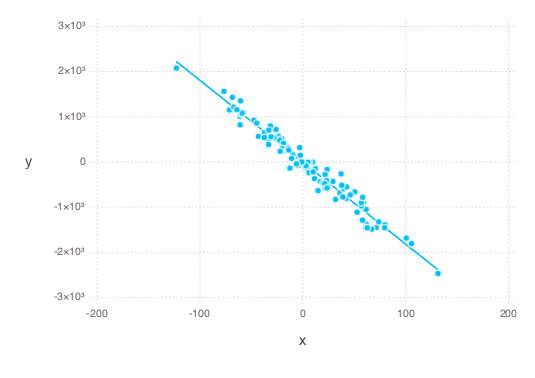

In [52]:
n = 100
σ = 200
λ = 20

X₁ = rand(Normal(0.0, 50), n)  ##linspace(-100, 100.0, n)
X = [ones(n) X₁]

p = size(X,2)

y₁ = -7.3 * 2.5X₁ + rand(Normal(0.0, σ), n)
LL = [layer(x=X₁, y=y₁, Geom.point)]

for λ in [0, 20, 100]
   
    β = inv(X'*X + λ*eye(p))*X'*y₁
    ŷ₁ = X*β
    R = rmse(ŷ₁, y₁)
    @printf("λ=%8.3lf\tRMSD=%8.3lf\n", λ, R)
    push!(LL, layer(x=X₁, y=ŷ₁, Geom.line))
end

plot(LL...)
